# PDS GRADED PROJECT


# Automobile Sales Analysis

## Data Overview

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [247]:
df = pd.read_csv(r"C:\Users\LOKI\Downloads\austo_automobile+%282%29+%281%29.csv")

In [248]:
df

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


In [249]:
a,b = df.shape
print(f"There are {a} rows and {b} columns in this dataset")

There are 1581 rows and 14 columns in this dataset


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [251]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [252]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


****Checking For Duplicates****

In [253]:
df.duplicated().sum()

0

In [254]:
categorical_columns = ["Gender","Profession","Marital_status","Education","Personal_loan","House_loan","Partner_working","Make"]
for i in categorical_columns:
    print(df[i].value_counts())
    print("-----")

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64
-----
Salaried    896
Business    685
Name: Profession, dtype: int64
-----
Married    1443
Single      138
Name: Marital_status, dtype: int64
-----
Post Graduate    985
Graduate         596
Name: Education, dtype: int64
-----
Yes    792
No     789
Name: Personal_loan, dtype: int64
-----
No     1054
Yes     527
Name: House_loan, dtype: int64
-----
Yes    868
No     713
Name: Partner_working, dtype: int64
-----
Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64
-----


****Missing Value Treatment****

In [255]:
df["Gender"].value_counts()


Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In 'Gender' Column, the word "Female" is spelled incorrectly 2 times and it is corrected

In [256]:
df.loc[df["Gender"]=="Femal"]


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV


In [257]:
df.loc[1,"Gender"]="Female"

In [258]:
df.loc[df["Gender"]=="Femle"]


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
305,40,Femle,Business,Married,Post Graduate,4,No,No,Yes,70000,70800.0,140800,65000,SUV


In [259]:
df.loc[305,"Gender"]="Female"

In [260]:
df["Gender"].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

There are 53 null values in Gender column and it is corrected.

In [261]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [262]:
df["Gender"]=df["Gender"].fillna(value = df["Gender"].mode()[0])

In [263]:
df["Gender"].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [264]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

* There are 106 null values in "Partner_salary" column.
* The "Total_salary" is the sum of "Salary" and "Partner_salary".
* So, the difference of "Total Salary" and "Salary" gives the "Partner_salary"

In [265]:
df["Partner_salary"] = df["Total_salary"] - df["Salary"]

## Univariate Analysis

**Observations on Age**

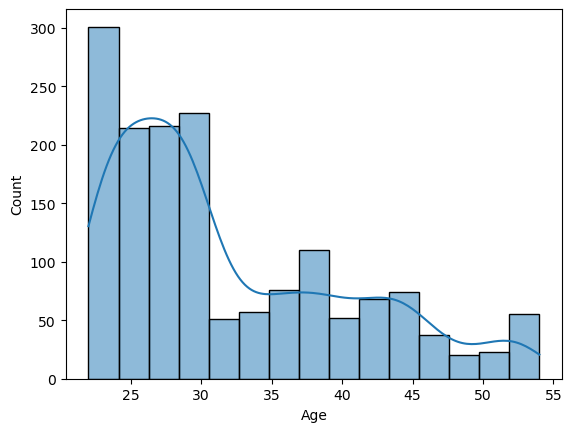

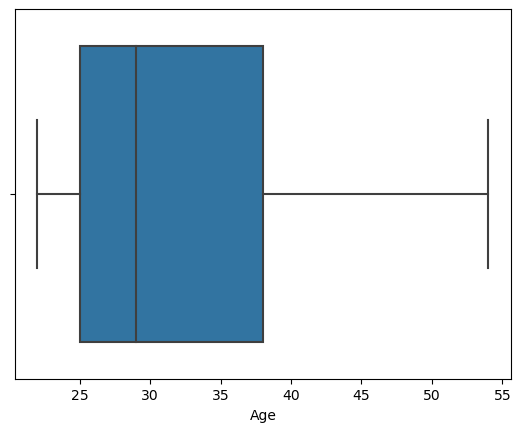

In [266]:
sns.histplot(df, x="Age",kde=True)
plt.show()
sns.boxplot(df,x="Age")
plt.show()

**Observations on Salary**

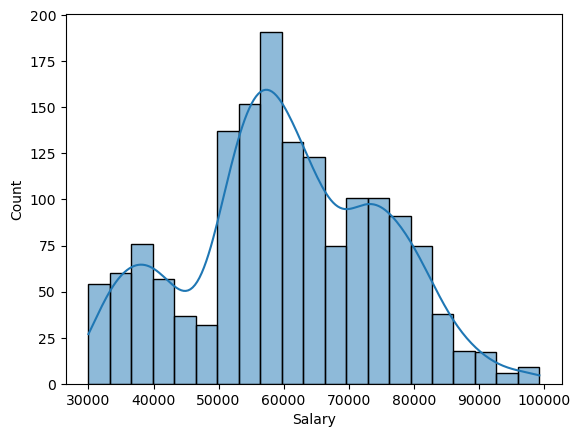

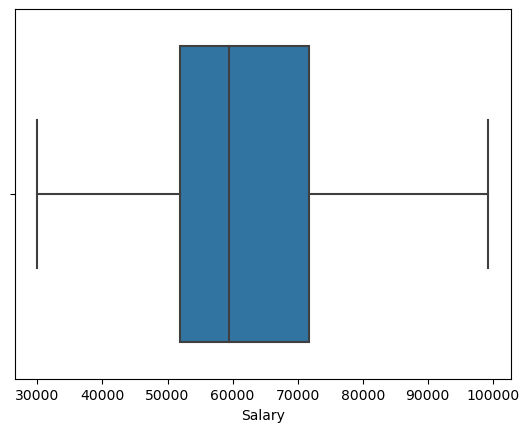

In [267]:
sns.histplot(df, x="Salary",kde=True)
plt.xlabel("Salary")
plt.show()
sns.boxplot(df,x="Salary")
plt.show()

**Observations on Partner Salary**

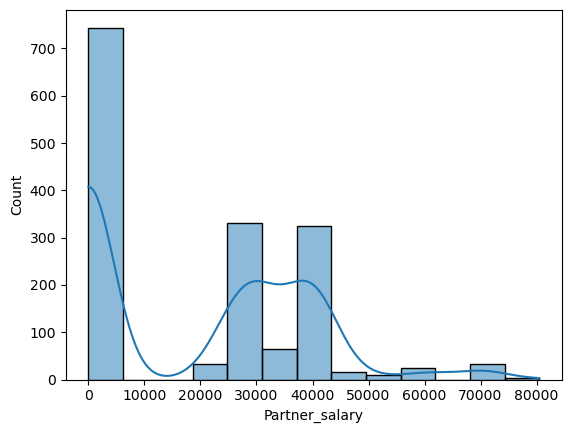

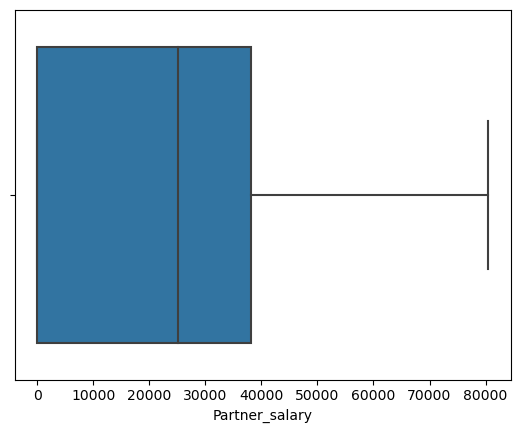

In [268]:
sns.histplot(df, x="Partner_salary",kde=True)
plt.show()
sns.boxplot(df,x="Partner_salary")
plt.show()

**Observations on Total Salary**

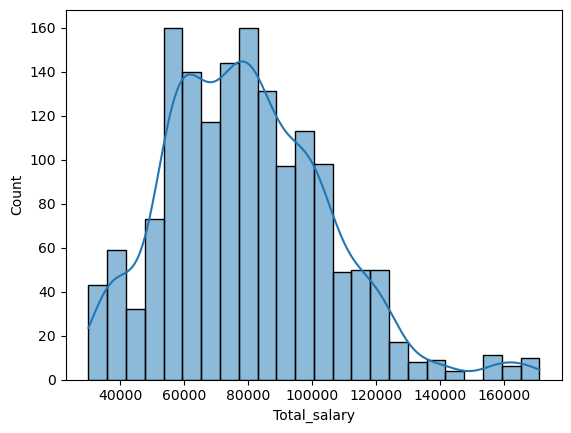

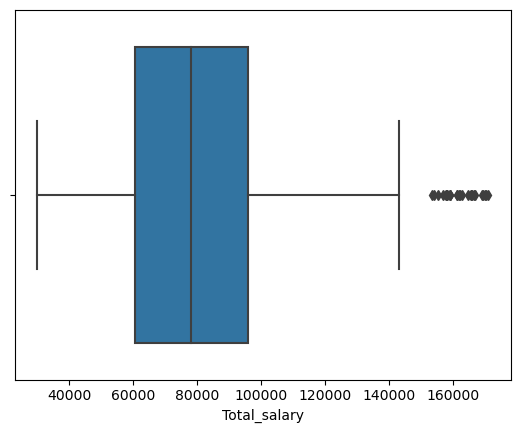

In [269]:
sns.histplot(df, x="Total_salary",kde=True)
plt.show()
sns.boxplot(df,x="Total_salary")
plt.show()

**Observations on Price**

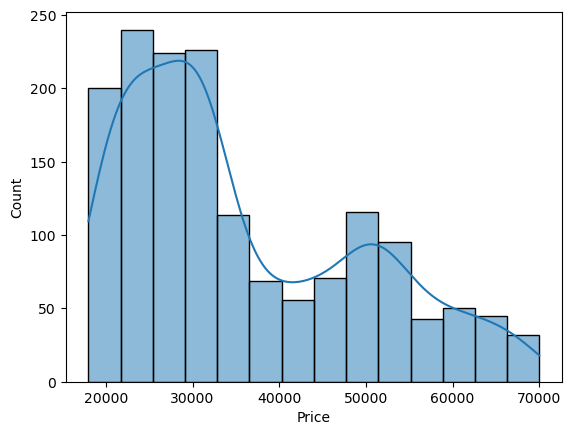

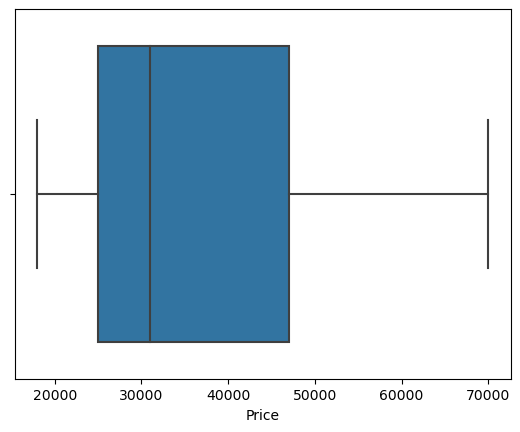

In [270]:
sns.histplot(df, x="Price",kde=True)
plt.show()
sns.boxplot(df,x="Price")
plt.show()

**Observations on Make**

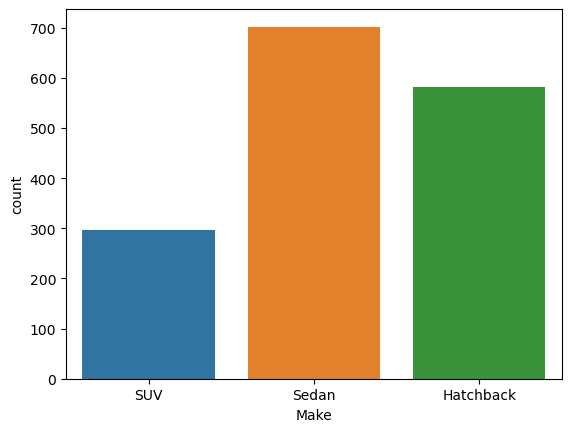

In [271]:
sns.countplot(df, x="Make");

**Observations on Gender**

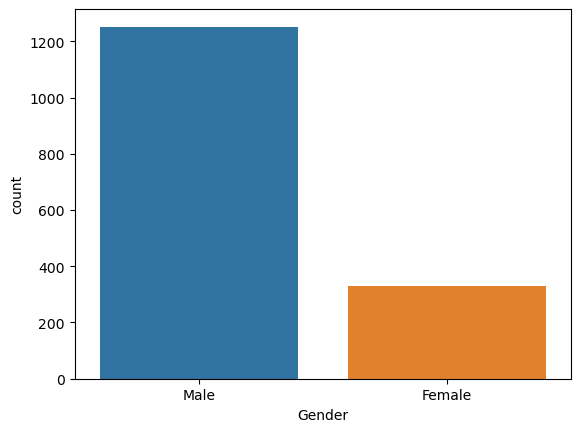

In [272]:
sns.countplot(df,x="Gender");

**Observations on Profession**

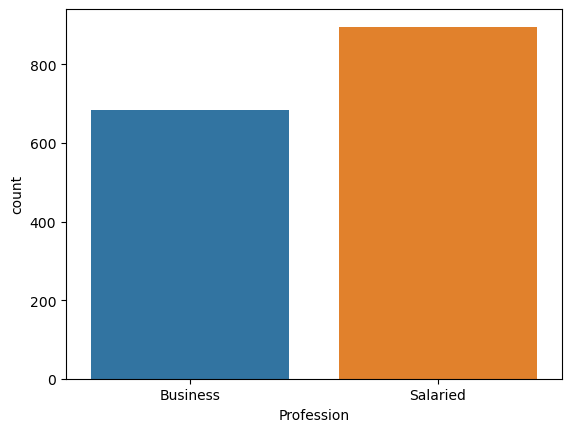

In [273]:
sns.countplot(df,x="Profession");

**Observations on Marital_status**

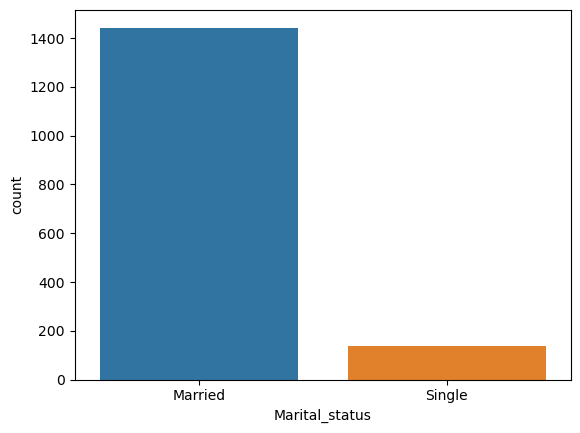

In [274]:
sns.countplot(df,x="Marital_status");

**Observations on Education**

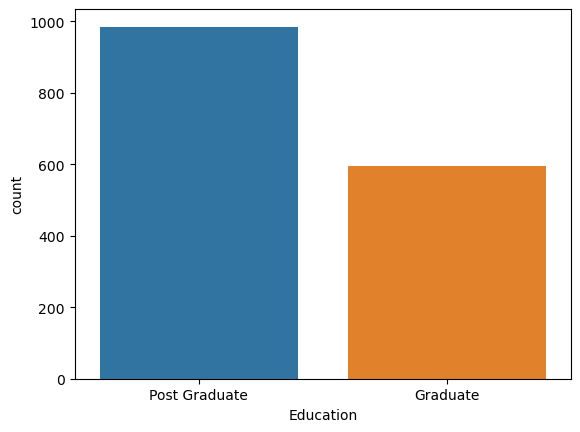

In [276]:
sns.countplot(df,x="Education");

**Observations on Personal_loan**

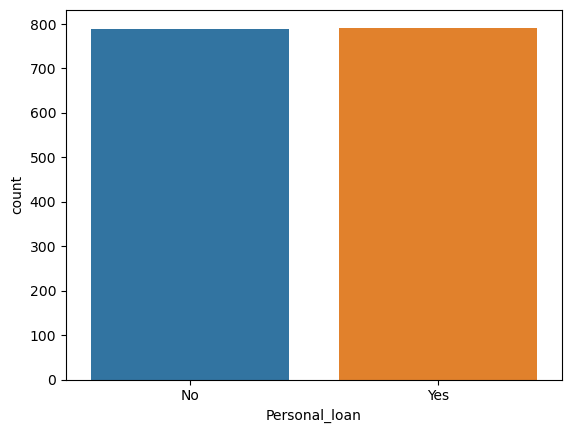

In [277]:
sns.countplot(df,x="Personal_loan");

**Observations on House_loan**

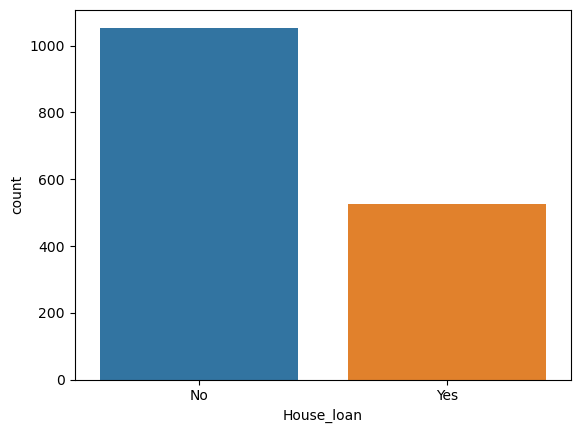

In [278]:
sns.countplot(df,x="House_loan");

**Observations on Partner_working**

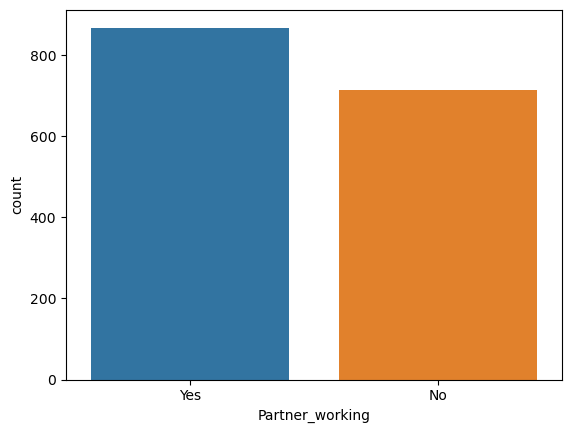

In [279]:
sns.countplot(df,x="Partner_working");

**Observations on No.of.Dependents**

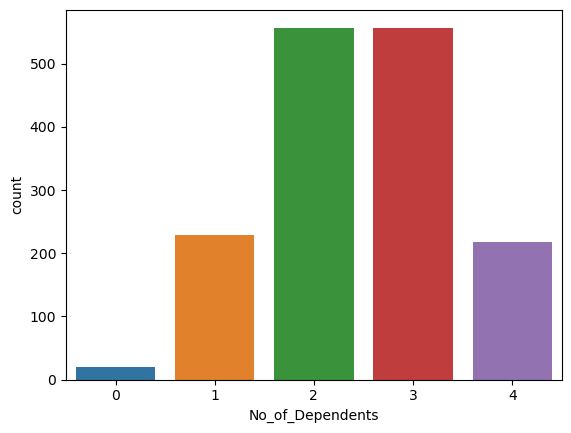

In [280]:
sns.countplot(df,x="No_of_Dependents");

## Bivariate Analysis

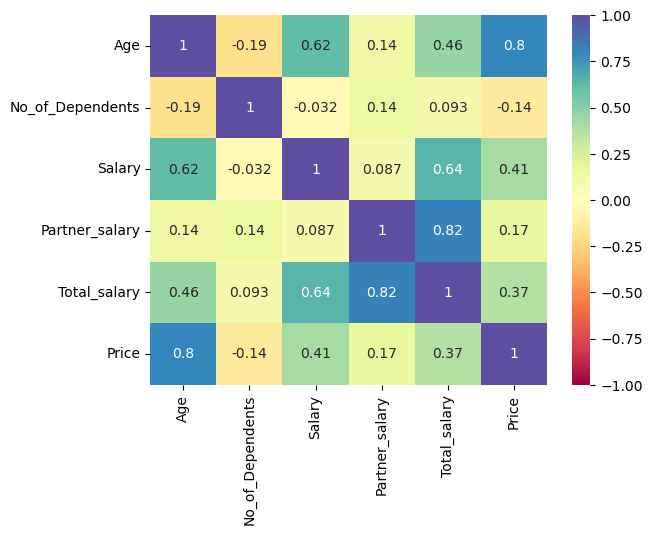

In [281]:
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="Spectral",vmin=-1,vmax=1);

**Relationships Between Numerical(Continous) variables**

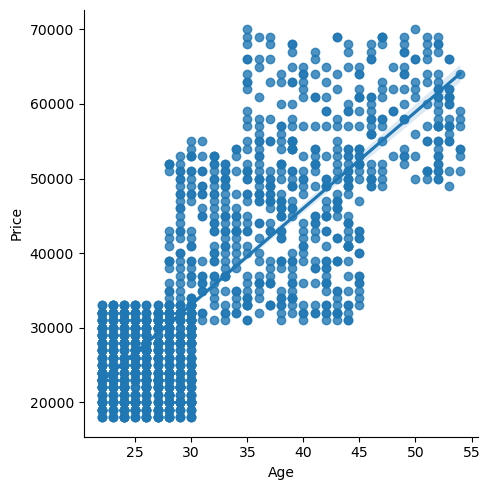

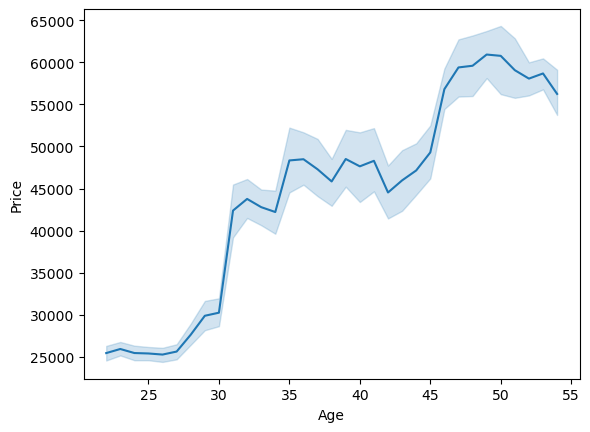

In [282]:
sns.lmplot(df,x="Age",y="Price")
plt.show()
sns.lineplot(df,x="Age",y="Price")
plt.show()

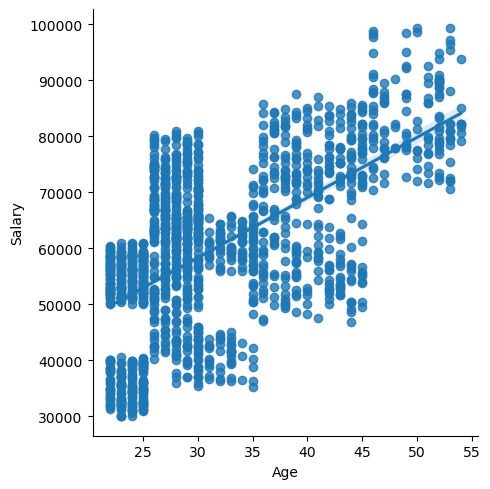

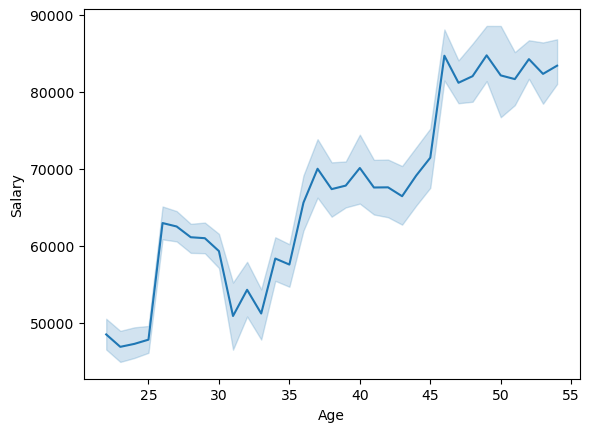

In [283]:
sns.lmplot(df,x="Age",y="Salary")
plt.show()
sns.lineplot(df,x="Age",y="Salary")
plt.show()

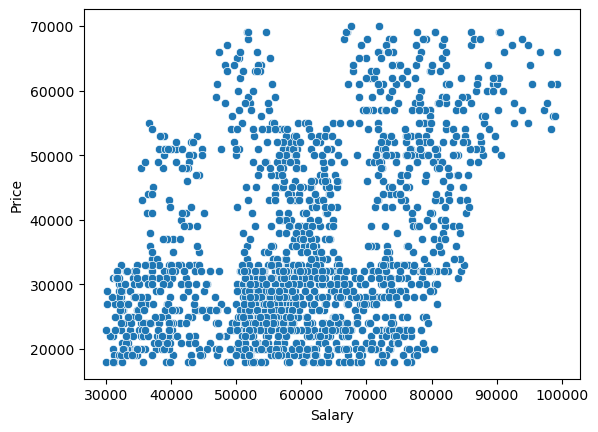

In [284]:
sns.scatterplot(df,x="Salary",y="Price");

**Relationships between Categorical variables**

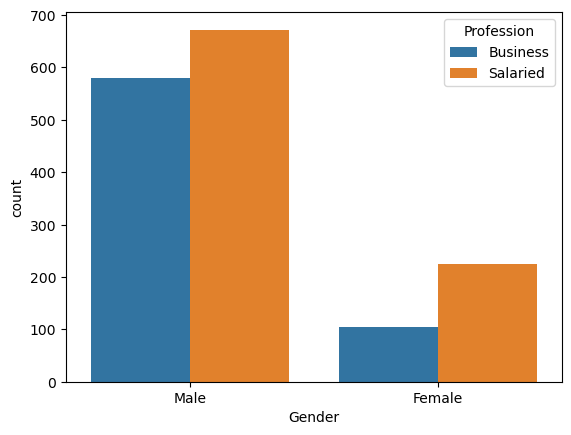

In [285]:
sns.countplot(df,x="Gender",hue="Profession");

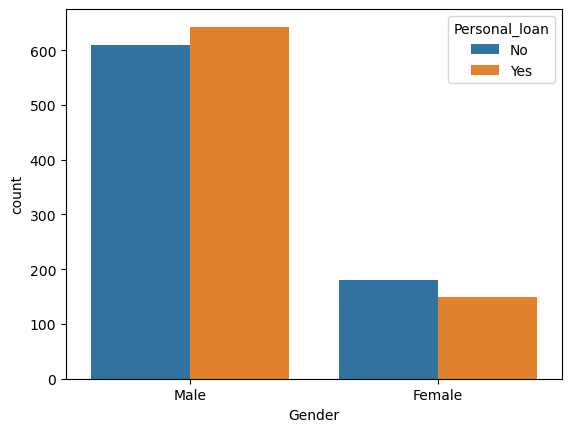

In [286]:
sns.countplot(df,x="Gender",hue="Personal_loan");

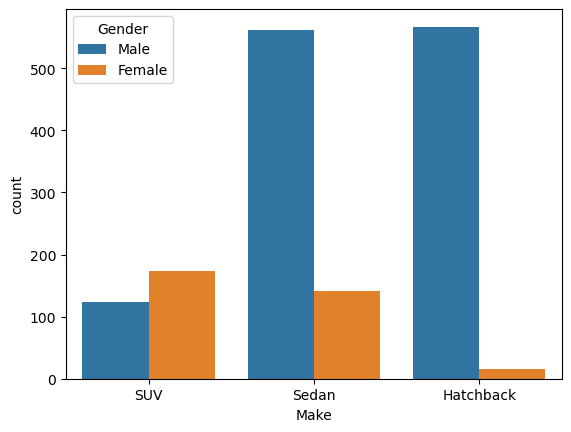

In [287]:
sns.countplot(df,x="Make",hue="Gender");

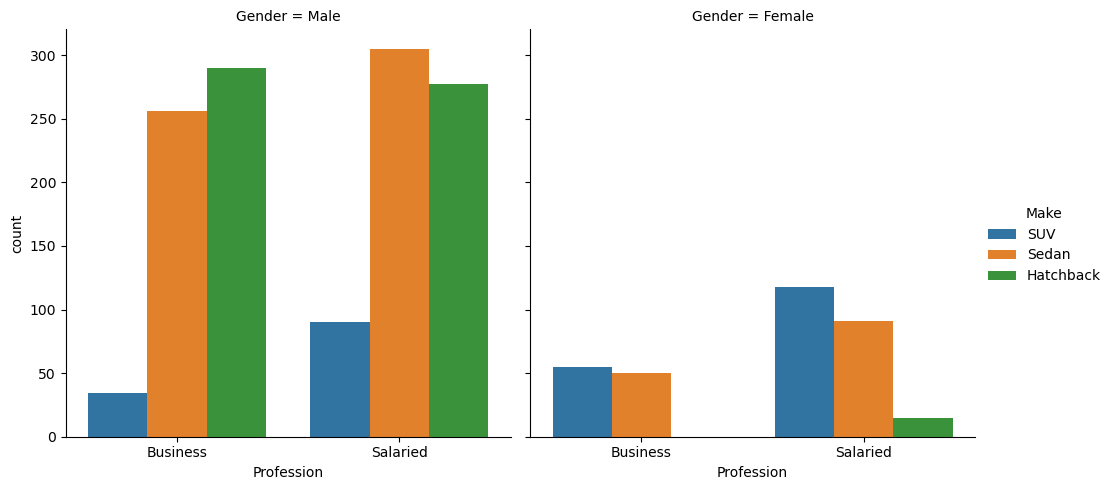

In [288]:
sns.catplot(data=df,x="Profession",hue="Make",col="Gender",kind="count");

**Relationships between Numerical variables and Categorical variables**

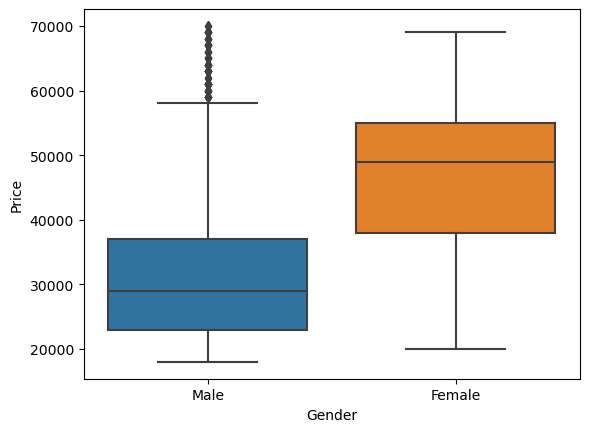

In [289]:
sns.boxplot(df,x="Gender",y="Price");

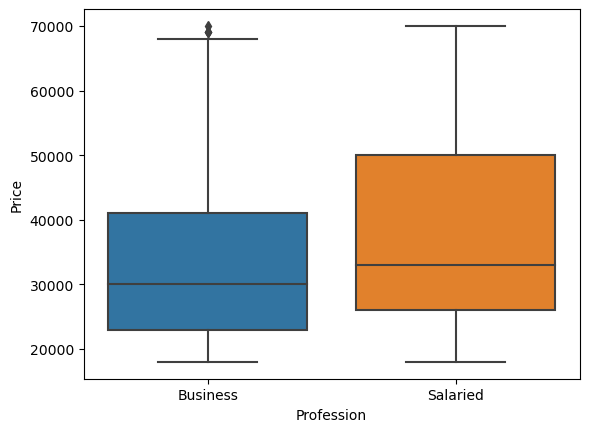

In [290]:
sns.boxplot(df,x="Profession",y="Price");

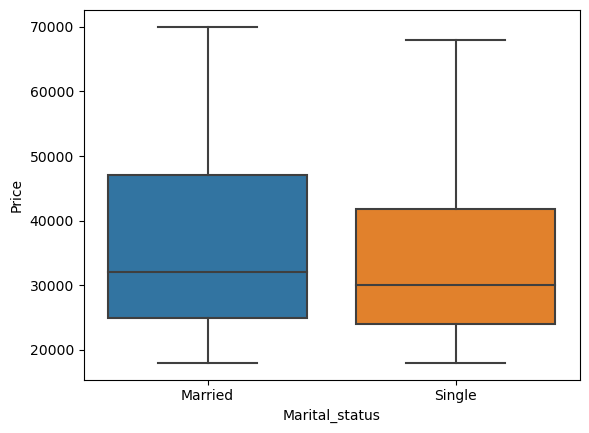

In [291]:
sns.boxplot(df,x="Marital_status",y="Price");

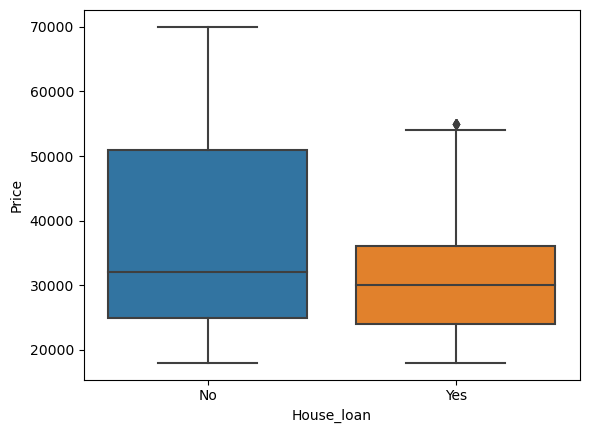

In [292]:
sns.boxplot(df,x="House_loan",y="Price");

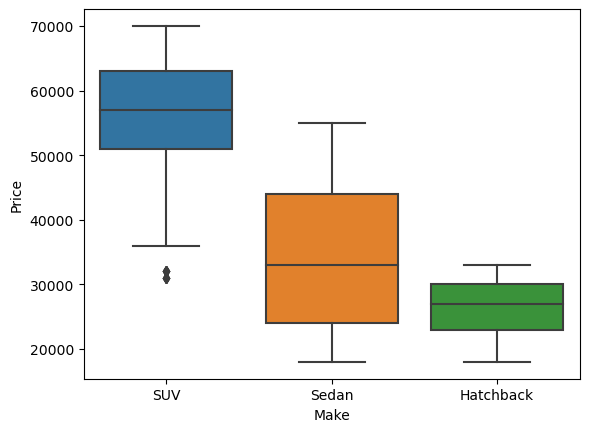

In [293]:
sns.boxplot(df,x="Make",y="Price");

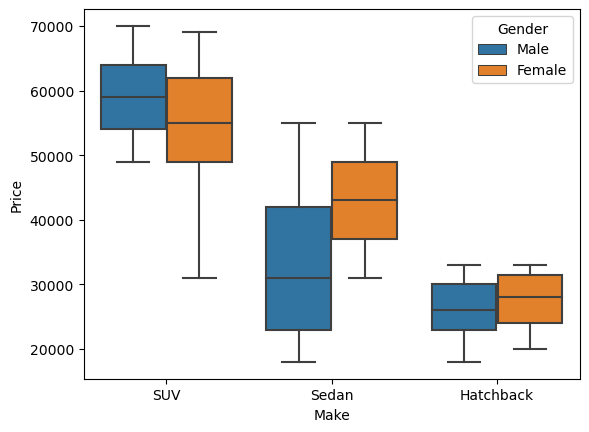

In [294]:
sns.boxplot(df,x="Make",y="Price",hue="Gender");

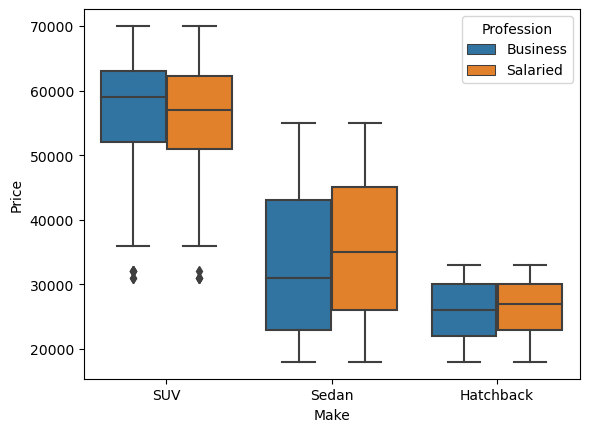

In [295]:
sns.boxplot(df,x="Make",y="Price",hue="Profession");

## Key Questions

### 1. Do men tend to prefer SUVs more compared to women?

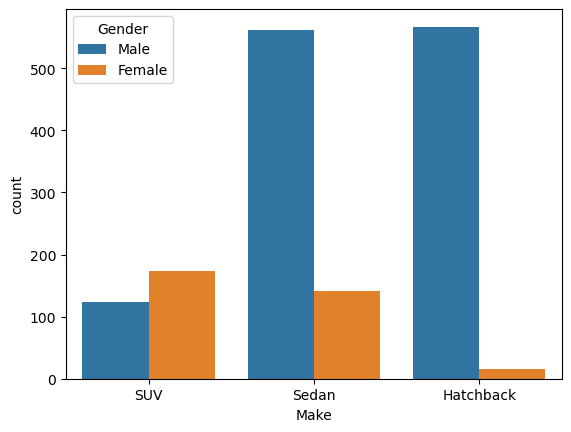

In [296]:
sns.countplot(df,x="Make",hue="Gender");

In [297]:
df.groupby(["Gender"])["Make"].value_counts()

Gender  Make     
Female  SUV          173
        Sedan        141
        Hatchback     15
Male    Hatchback    567
        Sedan        561
        SUV          124
Name: Make, dtype: int64

In [298]:
df.groupby(["Gender"])["Make"].value_counts(normalize=True)

Gender  Make     
Female  SUV          0.525836
        Sedan        0.428571
        Hatchback    0.045593
Male    Hatchback    0.452875
        Sedan        0.448083
        SUV          0.099042
Name: Make, dtype: float64

###  2. What is the likelihood of a salaried person buying a Sedan?

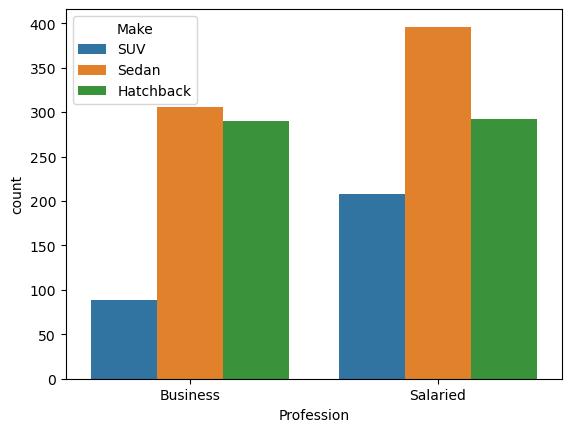

In [299]:
sns.countplot(df,x="Profession",hue="Make");

In [300]:
df.groupby(["Profession"])["Make"].value_counts()

Profession  Make     
Business    Sedan        306
            Hatchback    290
            SUV           89
Salaried    Sedan        396
            Hatchback    292
            SUV          208
Name: Make, dtype: int64

In [301]:
df.groupby(["Profession"])["Make"].value_counts(normalize=True)

Profession  Make     
Business    Sedan        0.446715
            Hatchback    0.423358
            SUV          0.129927
Salaried    Sedan        0.441964
            Hatchback    0.325893
            SUV          0.232143
Name: Make, dtype: float64

###  3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

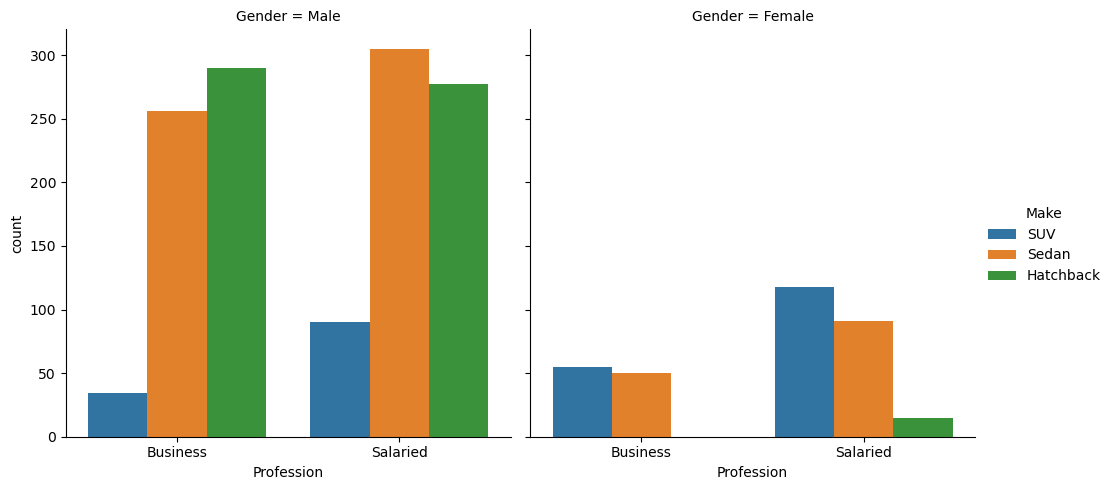

In [302]:
sns.catplot(df,x="Profession",hue="Make",col="Gender",kind="count");

In [303]:
df.groupby(["Profession","Gender"])["Make"].value_counts()

Profession  Gender  Make     
Business    Female  SUV           55
                    Sedan         50
            Male    Hatchback    290
                    Sedan        256
                    SUV           34
Salaried    Female  SUV          118
                    Sedan         91
                    Hatchback     15
            Male    Sedan        305
                    Hatchback    277
                    SUV           90
Name: Make, dtype: int64

In [304]:
df.groupby(["Profession","Gender"])["Make"].value_counts(normalize=True)

Profession  Gender  Make     
Business    Female  SUV          0.523810
                    Sedan        0.476190
            Male    Hatchback    0.500000
                    Sedan        0.441379
                    SUV          0.058621
Salaried    Female  SUV          0.526786
                    Sedan        0.406250
                    Hatchback    0.066964
            Male    Sedan        0.453869
                    Hatchback    0.412202
                    SUV          0.133929
Name: Make, dtype: float64

###  4. How does the the amount spent on purchasing automobiles vary by gender?

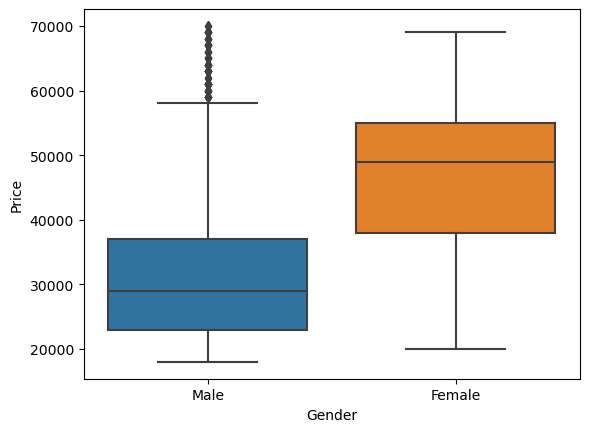

In [305]:
sns.boxplot(df,x="Gender",y="Price");

In [306]:
df["Gender"].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [307]:
mean_price = df.groupby(["Gender"])["Price"].mean()
mean_price_df= pd.DataFrame(mean_price)
mean_price_df

,Price
Gender,
Female,47705.167173
Male,32416.134185


In [308]:
median_price = df.groupby(["Gender"])["Price"].median()
median_price_df= pd.DataFrame(median_price)
median_price_df

,Price
Gender,
Female,49000.0
Male,29000.0


###  5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

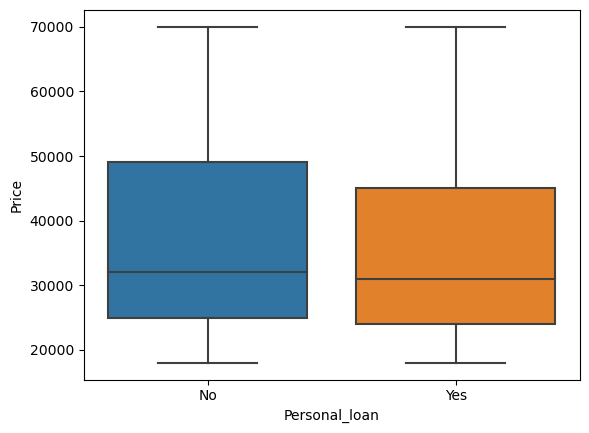

In [309]:
sns.boxplot(df,x="Personal_loan",y="Price");

In [310]:
print("   Mean Price")
df.groupby("Personal_loan")["Price"].mean()

   Mean Price


Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64

In [311]:
print("   Median Price")
df.groupby("Personal_loan")["Price"].median()

   Median Price


Personal_loan
No     32000.0
Yes    31000.0
Name: Price, dtype: float64

### 6. How does having a working partner influence the purchase of higher-priced cars?

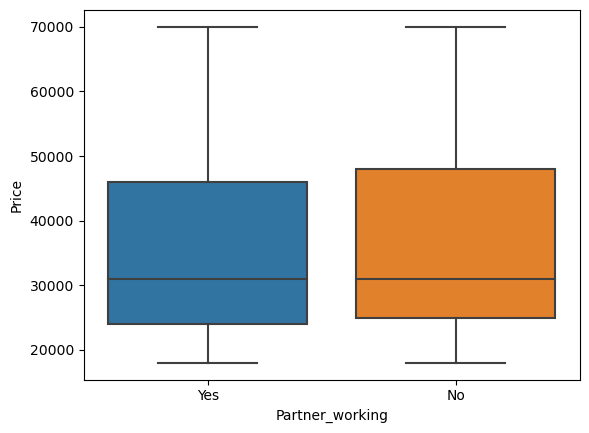

In [312]:
sns.boxplot(df,x="Partner_working",y="Price");

In [313]:
print("   Mean Price")
df.groupby(["Partner_working"])["Price"].mean()

   Mean Price


Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64

In [314]:
print("   Median Price")
df.groupby(["Partner_working"])["Price"].median()

   Median Price


Partner_working
No     31000.0
Yes    31000.0
Name: Price, dtype: float64